Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

# Análisis Exploratorio de Datos

## Librerias

In [36]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from PIL import Image
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

## Carga de Datos

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')



## Exploración de Datos

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [4]:
train_df.isnull().sum()

ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

In [5]:
train_df.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


## Eliminación de colummnas innecesarias

In [6]:
train_df.drop(columns=['ID'], inplace=True)
test_df.drop(columns=['ID'], inplace=True)

In [7]:
correlation_matrix = train_df.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print("\nEliminando columnas altamente correlacionadas:", highly_correlated_features)
train_df.drop(columns=highly_correlated_features, inplace=True)
test_df.drop(columns=[col for col in highly_correlated_features if col in test_df.columns], inplace=True)


Eliminando columnas altamente correlacionadas: []


In [8]:
low_variance_features = train_df.std()[train_df.std() < 0.01].index.tolist()
print("\nEliminando columnas con baja variabilidad:", low_variance_features)
train_df.drop(columns=low_variance_features, inplace=True)
test_df.drop(columns=[col for col in low_variance_features if col in test_df.columns], inplace=True)


Eliminando columnas con baja variabilidad: ['col15']


In [9]:
drop_columns = ['col16', 'col5', 'col7', 'col8', 'col9', 'col10', 'col18', 'col19', 'col20', 'col3', 'col11']
print("\nEliminando columnas adicionales basadas en análisis gráfico:", drop_columns)
train_df.drop(columns=drop_columns, inplace=True, errors='ignore')
test_df.drop(columns=[col for col in drop_columns if col in test_df.columns], inplace=True, errors='ignore')


Eliminando columnas adicionales basadas en análisis gráfico: ['col16', 'col5', 'col7', 'col8', 'col9', 'col10', 'col18', 'col19', 'col20', 'col3', 'col11']


## Graficas

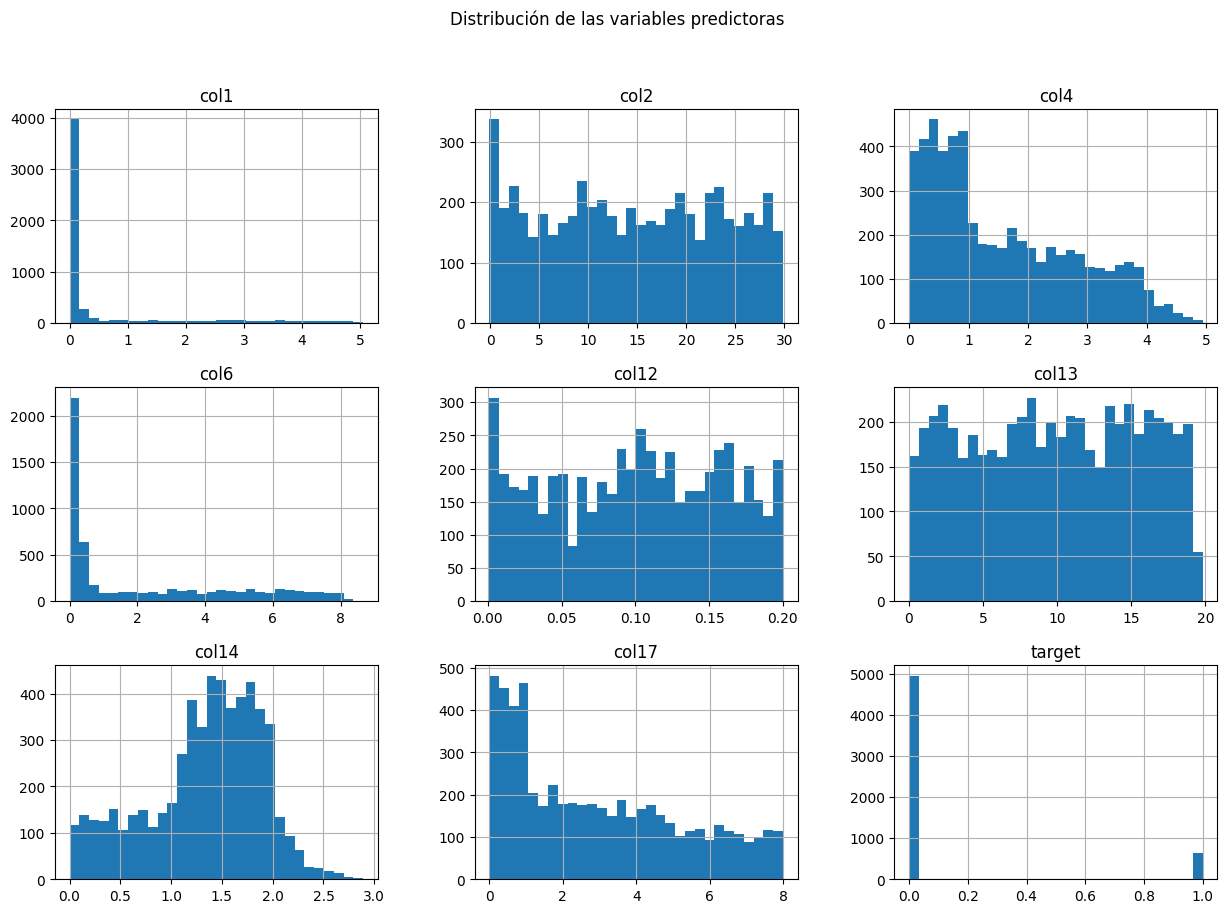

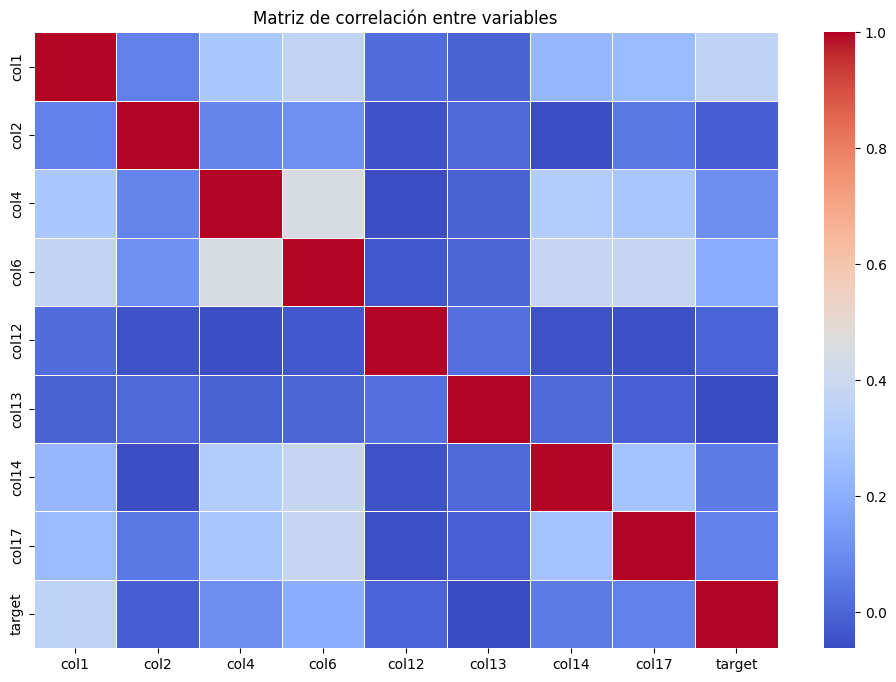

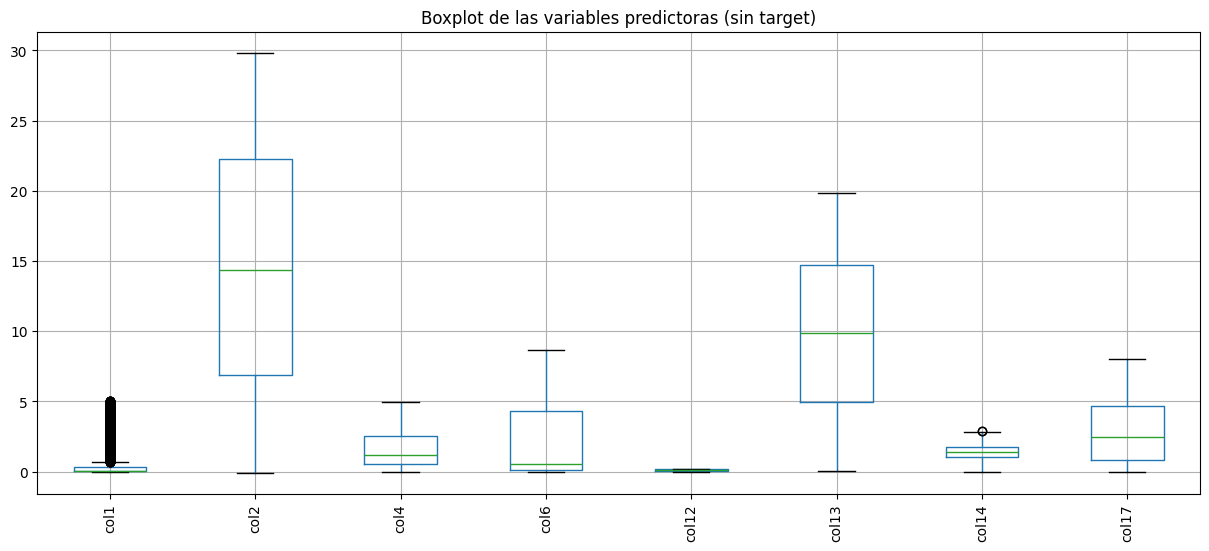

In [10]:
# Histogramas de las variables predictoras
train_df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribución de las variables predictoras")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación entre variables")
plt.show()

# Boxplots para identificar valores atípicos
plt.figure(figsize=(15, 6))
train_df.drop(columns=['target'], inplace=False).boxplot(rot=90)
plt.title("Boxplot de las variables predictoras (sin target)")
plt.show()

## Modelos de Predicción

In [11]:
X = train_df.drop(columns=['target'])
y = train_df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Transformación 

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Regresión lineal

In [29]:
print("\nModelo: Regresión Logística")
logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight={0: 0.6, 1: 0.4})
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_val)[:, 1]
y_pred_log = (y_prob >= 0.35).astype(int)
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_log))
print("Reporte de clasificación:")
print(classification_report(y_val, y_pred_log))


Modelo: Regresión Logística
Matriz de confusión:
[[971  21]
 [111  17]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       992
           1       0.45      0.13      0.20       128

    accuracy                           0.88      1120
   macro avg       0.67      0.56      0.57      1120
weighted avg       0.85      0.88      0.85      1120



Esta dectectando el target pero el recall es muy bajo

### Random Forest

In [32]:
print("\nModelo: Random Forest")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight={0: 0.6, 1: 0.4}), param_grid, cv=3, scoring='recall')
rf.fit(X_train, y_train)
y_pred_rf = rf.best_estimator_.predict(X_val)
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_rf))
print("Reporte de clasificación:")
print(classification_report(y_val, y_pred_rf))




Modelo: Random Forest
Matriz de confusión:
[[961  31]
 [101  27]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       992
           1       0.47      0.21      0.29       128

    accuracy                           0.88      1120
   macro avg       0.69      0.59      0.61      1120
weighted avg       0.85      0.88      0.86      1120



Tiene mejores resultados que el modelo anterior, pero, aun es bajo el recall

In [41]:
print("\nRealizando selección de características con Random Forest")
feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X_train, y_train)
selector = SelectFromModel(feature_selector, prefit=True)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Realizando selección de características con Random Forest
Características seleccionadas: Index(['col1', 'col6'], dtype='object')


In [42]:
print("\nModelo: Random Forest - Optimización de hiperparámetros")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight={0: 0.6, 1: 0.4}), param_grid, cv=3, scoring='recall', n_jobs=-1)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.best_estimator_.predict(X_val_selected)
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_rf))
print("Reporte de clasificación:")
print(classification_report(y_val, y_pred_rf))


Modelo: Random Forest - Optimización de hiperparámetros
Matriz de confusión:
[[932  60]
 [105  23]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       992
           1       0.28      0.18      0.22       128

    accuracy                           0.85      1120
   macro avg       0.59      0.56      0.57      1120
weighted avg       0.83      0.85      0.84      1120



notas: mejora los resultados en comparación a otros modelos, pero, no es el mejor. Me estoy quedando sin ideas

### KNN

In [33]:
print("\nModelo: K-Nearest Neighbors")
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
print("\nMatriz de confusión:")
print(confusion_matrix(y_val, y_pred_knn))
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred_knn))


Modelo: K-Nearest Neighbors

Matriz de confusión:
[[958  34]
 [110  18]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       992
           1       0.35      0.14      0.20       128

    accuracy                           0.87      1120
   macro avg       0.62      0.55      0.57      1120
weighted avg       0.83      0.87      0.85      1120



No me sirve para nada este modelo porque no tiene presicion

### SVM

In [34]:
print("\nModelo: SVM")
svm = SVC(probability=True, random_state=42, class_weight={0: 0.6, 1: 0.4})
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_svm))
print("Reporte de clasificación:")
print(classification_report(y_val, y_pred_svm))


Modelo: SVM
Matriz de confusión:
[[992   0]
 [128   0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       992
           1       0.00      0.00      0.00       128

    accuracy                           0.89      1120
   macro avg       0.44      0.50      0.47      1120
weighted avg       0.78      0.89      0.83      1120



c:\Users\garci\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-wXHT794i-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\garci\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-wXHT794i-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\garci\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-wXHT794i-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

No decteca la target 

### Arbol de decision

In [35]:
print("\nModelo: Árbol de Decisión")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print("\nMatriz de confusión:")
print(confusion_matrix(y_val, y_pred_dt))
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred_dt))


Modelo: Árbol de Decisión

Matriz de confusión:
[[896  96]
 [ 83  45]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       992
           1       0.32      0.35      0.33       128

    accuracy                           0.84      1120
   macro avg       0.62      0.63      0.62      1120
weighted avg       0.85      0.84      0.84      1120



Mejor recall, pero sacrificando precisión.